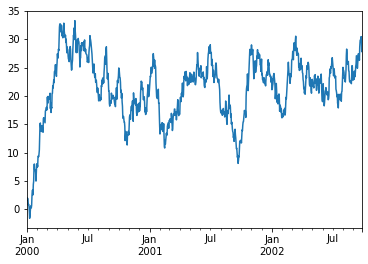

<Figure size 432x288 with 0 Axes>

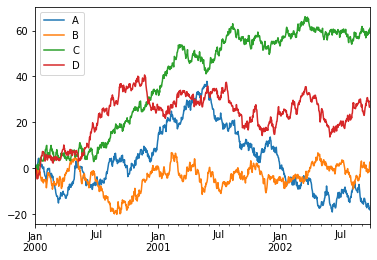

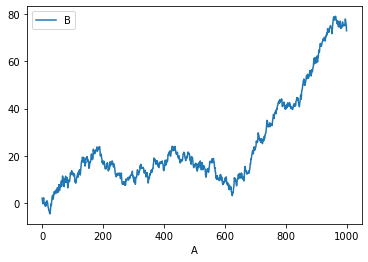

In [214]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

plt.close('all')

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()

plt.figure();
df.plot();

df3 = pd.DataFrame(np.random.randn(1000, 2), columns=['B', 'C']).cumsum()

df3['A'] = pd.Series(list(range(len(df))))
df3.plot(x='A', y='B')

In [144]:
df_RTSI = pd.read_csv('RTSI.csv', encoding='ANSI', skiprows=2, delimiter=';')
# df = pd.read_csv('RTSI-dailyhistory-ru.csv', encoding='ANSI', delimiter=';')
df_RTSI.tail()

,BOARDID,SECID,TRADEDATE,SHORTNAME,NAME,CLOSE,OPEN,HIGH,LOW,VALUE,DURATION,YIELD,DECIMALS,CAPITALIZATION,CURRENCYID,DIVISOR
95,RTSI,RTSI,2020-07-06,Индекс РТС,Индекс РТС,"1247,14","1246,84","1266,28","1241,71","1029049011,28",0.0,0.0,2,168563995035,USD,"135160162,611000"
96,RTSI,RTSI,2020-07-03,Индекс РТС,Индекс РТС,"1235,18","1245,05","1252,64","1229,44","568342237,344",0.0,0.0,2,166947610161,USD,"135160162,611000"
97,RTSI,RTSI,2020-07-02,Индекс РТС,Индекс РТС,"1248,28","1222,73","1250,57","1220,84","886972343,516",0.0,0.0,2,168717420191,USD,"135160162,611000"
98,RTSI,RTSI,2020-06-30,Индекс РТС,Индекс РТС,"1212,63","1246,93","1250,32","1212,63","869215452,084",0.0,0.0,2,163899521263,USD,"135160162,611000"
99,RTSI,RTSI,2020-06-29,Индекс РТС,Индекс РТС,"1239,81",1241,"1249,45","1230,11","800323975,107",0.0,0.0,2,167573161402,USD,"135160162,611000"


In [178]:
# idf = df[['TRADEDATE', 'CLOSE', 'CAPITALIZATION']]
idf = df_RTSI[['TRADEDATE', 'CLOSE']]
idf.head()

,TRADEDATE,CLOSE
0,2020-11-17,"1258,46"
1,2020-11-16,"1268,61"
2,2020-11-13,"1227,78"
3,2020-11-12,"1238,45"
4,2020-11-11,"1233,81"


In [179]:
def convert_to_point(line):
    line = line.replace(',', '.')
    return line

idf['CLOSE'] = idf['CLOSE'].apply(convert_to_point)
idf['CLOSE'] = idf.CLOSE.astype(float)
# idf['CAPITALIZATION'] = idf['CAPITALIZATION'].apply(convert_to_point)
# idf['CAPITALIZATION'] = idf.CAPITALIZATION.astype(float)
idf['TRADEDATE'] = pd.to_datetime(idf['TRADEDATE'])
idf = idf.set_index('TRADEDATE')
idf.dtypes
# print(idf.index)

CLOSE    float64
dtype: object

In [184]:
idf.sort_values(by=['CLOSE'])
idf.tail()

,CLOSE
TRADEDATE,
2020-07-06,1247.14
2020-07-03,1235.18
2020-07-02,1248.28
2020-06-30,1212.63
2020-06-29,1239.81


(array([737607., 737638., 737669., 737699., 737730.]),
 <a list of 5 Text major ticklabel objects>)

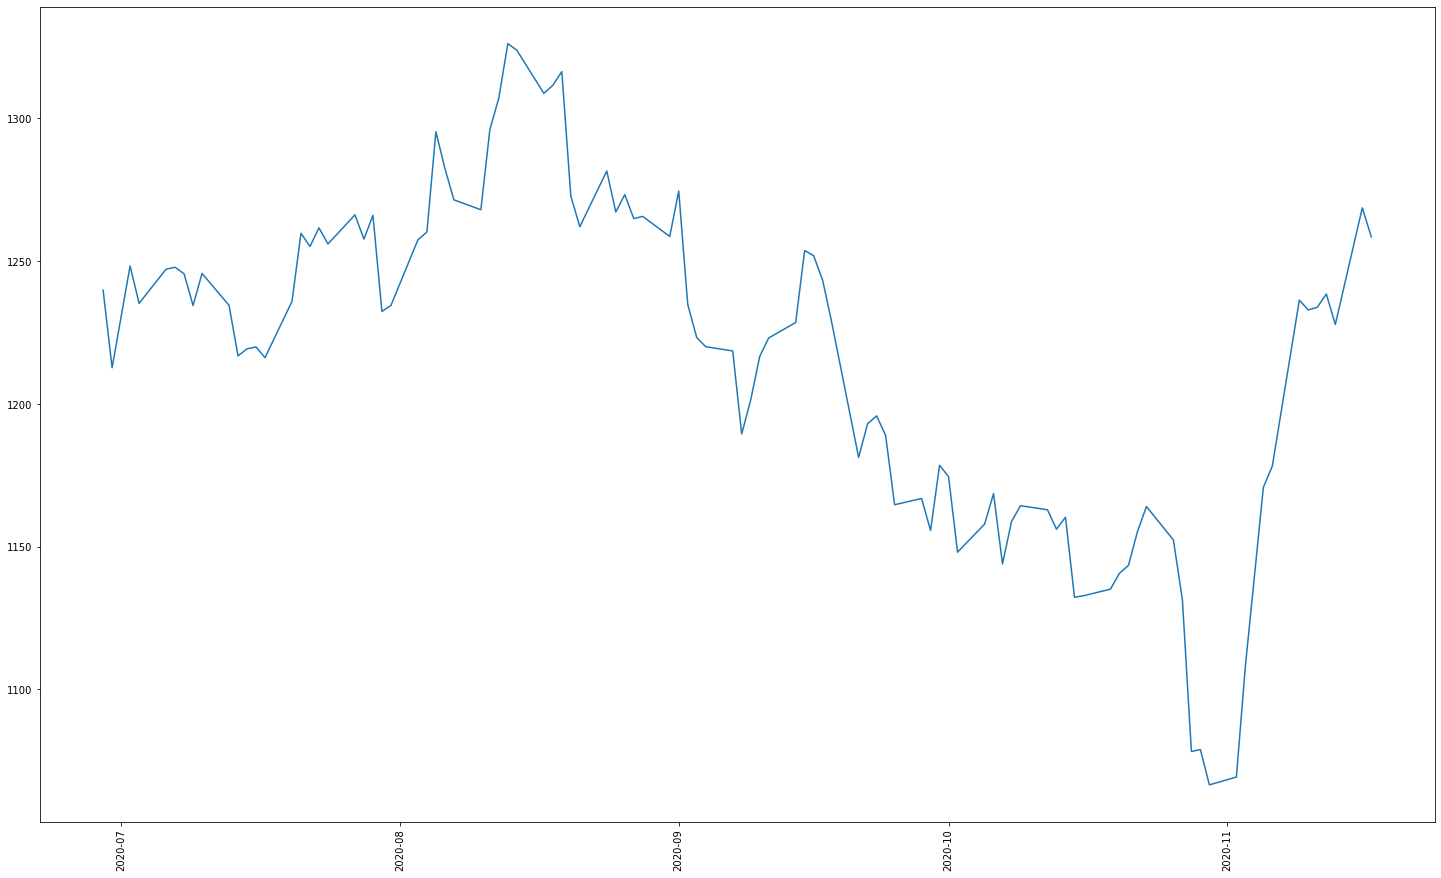

In [117]:
plt.figure(figsize=(25,15))
plt.plot(idf['TRADEDATE'], idf['CLOSE'])
plt.xticks(rotation='vertical')

In [166]:
import pandas_datareader.data as web
f = web.DataReader('GAZP', 'moex', start='2020-06-29', end='2020-11-17')
f.tail()

,ADMITTEDQUOTE,ADMITTEDVALUE,BEICLOSE,BID,BOARDID,BOARDNAME,BUYBACKDATE,CBRCLOSE,CLOSE,CLOSEAUCTIONPRICE,...,TRENDCLSPR,TRENDWAP,TRENDWAPPR,TYPE,VALUE,VOLUME,WAPRICE,WAVAL,YIELDLASTCOUPON,YIELDTOOFFER
TRADEDATE,,,,,,,,,,,,,,,,,,,,,
2020-11-16,NaN,0.000000e+00,NaN,NaN,SMAL,NaN,NaN,NaN,185.17,NaN,...,NaN,NaN,NaN,NaN,1.905557e+04,104.0,183.14,0.0,NaN,NaN
2020-11-16,NaN,0.000000e+00,NaN,NaN,SMAL,NaN,NaN,NaN,185.17,NaN,...,NaN,NaN,NaN,NaN,1.905557e+04,104.0,183.14,0.0,NaN,NaN
2020-11-16,185.3,1.548133e+10,NaN,NaN,TQBR,NaN,NaN,NaN,185.32,NaN,...,NaN,NaN,NaN,NaN,1.641758e+10,89649230.0,183.14,0.0,NaN,NaN
2020-11-17,NaN,0.000000e+00,NaN,NaN,SMAL,NaN,NaN,NaN,183.60,NaN,...,NaN,NaN,NaN,NaN,7.277380e+03,40.0,181.77,0.0,NaN,NaN
2020-11-17,182.9,1.690447e+10,NaN,NaN,TQBR,NaN,NaN,NaN,182.90,NaN,...,NaN,NaN,NaN,NaN,1.806010e+10,99345370.0,181.77,0.0,NaN,NaN


In [168]:
f = f[f['BOARDID'] == 'TQBR']
# f = f.reset_index()
# ticker = f[['TRADEDATE', 'CLOSE']]
ticker = f[['CLOSE']]
# ticker.set_index('TRADEDATE')
ticker.tail()

,CLOSE
TRADEDATE,
2020-11-11,170.53
2020-11-12,172.91
2020-11-13,180.30
2020-11-16,185.32
2020-11-17,182.90


In [205]:
ticker.sort_values(by=['TRADEDATE'])
ticker.rename(columns = {'CLOSE':'CLOSE_GAZP'}, inplace = True) 
print(ticker.dtypes)

CLOSE_GAZP    float64
dtype: object


In [206]:
idf.sort_values(by=['TRADEDATE'])
print(idf.dtypes)

CLOSE    float64
dtype: object


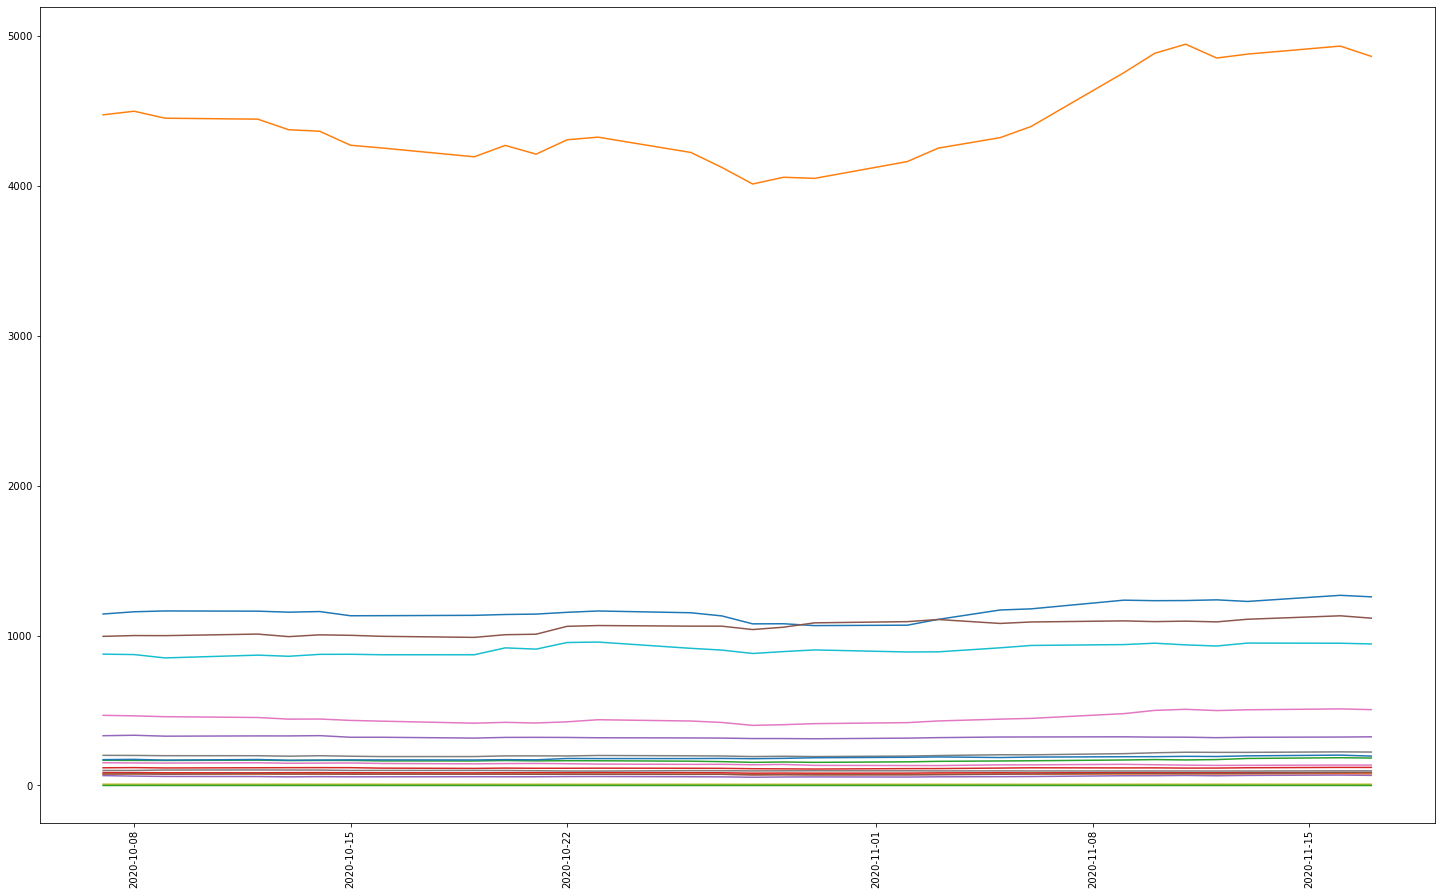

In [276]:
plt.figure(figsize=(25,15))
plt.xticks(rotation='vertical')

# df_compare = pd.concat([idf, ticker], axis=1, join='inner')
# df_compare = idf.join(ticker, how='inner')
# df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list('ABCD'))
df_compare
plt.plot(df_compare);

In [278]:
df_corr = df_compare.corr()
# print(df_corr)

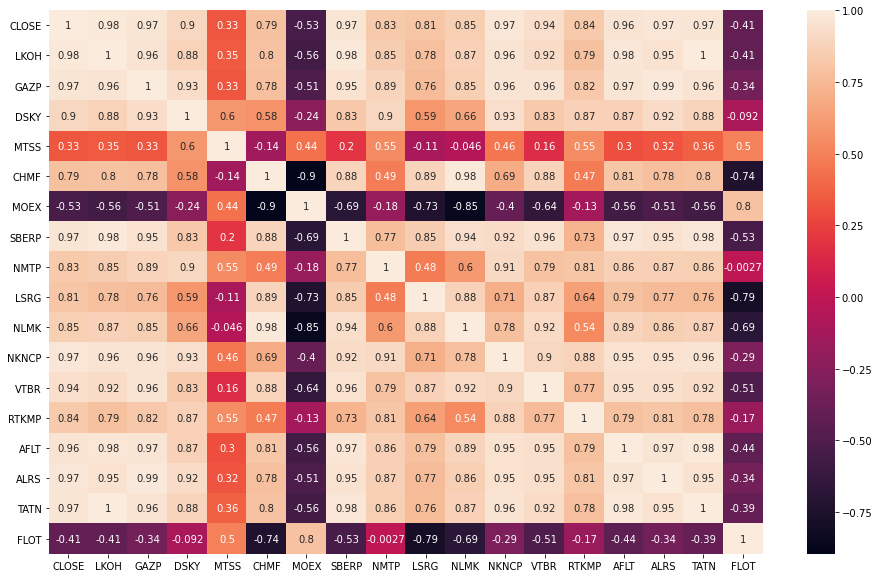

In [285]:
corrMatrix = df_compare.corr()
# print (corrMatrix)
plt.figure(figsize=(16, 10))
sn.heatmap(corrMatrix, annot=True)
# plt.figure(figsize=(15,15))
# plt.show()

In [302]:
def get_df_by_ticker(ticker_list, idf):
#     tmp = web.DataReader(ticker_list[0], 'moex', start='2020-06-29', end='2020-11-17')
#     tmp = tmp[tmp['BOARDID'] == 'TQBR']
#     itickers = tmp[['CLOSE']]
#     itickers.sort_values(by=['TRADEDATE'])
#     itickers.rename(columns = {'CLOSE':ticker_list[0]}, inplace = True)
#     print(itickers.head())
    itickers = idf
    for x in range(len(ticker_list)): 
        i = web.DataReader(ticker_list[x], 'moex', start='2020-06-29', end='2020-11-17')
        i = i[i['BOARDID'] == 'TQBR']
        iticker = i[['CLOSE']]
        iticker.sort_values(by=['TRADEDATE'])
        iticker.rename(columns = {'CLOSE':ticker_list[x]}, inplace = True)
#         print(iticker.head())
        itickers = itickers.join(iticker, how='inner')
#         print(itickers.head())
    return itickers

In [261]:
ticker_list = ['LKOH', 'GAZP']
# df_compare = idf.join(get_df_by_ticker(ticker_list), how='inner')
df_compare = get_df_by_ticker(ticker_list, idf)
df_compare.head()

,CLOSE,LKOH,GAZP
TRADEDATE,,,
2020-06-29,1239.81,5315.0,197.94
2020-06-30,1212.63,5313.0,194.31
2020-07-02,1248.28,5416.0,195.28
2020-07-03,1235.18,5416.5,197.20
2020-07-06,1247.14,5483.5,199.99


In [303]:
data = [['LKOH', 1], ['GAZP', 30], ['DSKY', 31], ['MTSS', 20], ['CHMF', 3], ['MOEX', 20], ['SBERP', 20],
        ['NMTP', 200], ['LSRG', 2], ['NLMK', 10], ['NKNCP', 20], ['VTBR', 30000], ['RTKMP', 30], ['AFLT', 10],
        ['ALRS', 10], ['TATN', 2], ['FLOT', 1]]
  
# Create the pandas DataFrame 
df_index = pd.DataFrame(data, columns = ['TICKER', 'SUM']) 
df_index.head()

,TICKER,SUM
0,LKOH,1
1,GAZP,30
2,DSKY,31
3,MTSS,20
4,CHMF,3


In [304]:
l = df_index['TICKER'].to_list()
print(l)

['LKOH', 'GAZP', 'DSKY', 'MTSS', 'CHMF', 'MOEX', 'SBERP', 'NMTP', 'LSRG', 'NLMK', 'NKNCP', 'VTBR', 'RTKMP', 'AFLT', 'ALRS', 'TATN', 'FLOT']


In [305]:
df_compare = get_df_by_ticker(l, idf)
df_compare.head()

,CLOSE,LKOH,GAZP,DSKY,MTSS,CHMF,MOEX,SBERP,NMTP,LSRG,NLMK,NKNCP,VTBR,RTKMP,AFLT,ALRS,TATN,FLOT
TRADEDATE,,,,,,,,,,,,,,,,,,
2020-10-07,1143.95,4474.0,168.23,118.10,332.00,994.8,151.90,201.10,8.420,876.2,172.48,76.60,0.033405,86.40,65.86,76.28,468.1,100.50
2020-10-08,1158.82,4498.0,167.43,119.30,335.15,1000.2,150.38,200.50,8.435,873.4,174.28,76.90,0.033395,85.95,62.72,77.70,464.5,100.50
2020-10-09,1164.34,4451.5,166.97,117.02,329.00,999.6,149.55,198.76,8.345,851.0,169.22,76.54,0.033205,84.90,60.26,75.41,459.0,103.00
2020-10-12,1162.91,4445.0,169.05,118.26,330.80,1010.0,151.66,198.60,8.320,869.6,173.28,75.90,0.033230,84.65,59.66,78.22,453.6,103.55
2020-10-13,1156.11,4374.5,166.37,118.90,330.60,993.0,148.40,195.40,8.300,862.0,168.28,75.88,0.033040,85.65,57.68,76.40,442.6,103.20


In [306]:
def MC(df_compare, l, df_index):
    df_compare_tmp = df_compare
    for x in range(len(l)): 
        mult = df_index.loc[df_index.TICKER == l[x]]
        df_compare_tmp[l[x]] = df_compare_tmp[l[x]]*mult['SUM'].iloc[0]
    return df_compare_tmp

# mult = df_index.loc[df_index.TICKER == 'GAZP']
# print(mult['SUM'].iloc[0])
# df_compare['GAZP'] = df_compare['GAZP']*mult['SUM'].iloc[0]
df_compare = MC(df_compare, l, df_index)
df_compare['MC'] = df_compare.sum(axis=1)-df_compare['CLOSE']
df_compare.head()

,CLOSE,LKOH,GAZP,DSKY,MTSS,CHMF,MOEX,SBERP,NMTP,LSRG,NLMK,NKNCP,VTBR,RTKMP,AFLT,ALRS,TATN,FLOT,MC
TRADEDATE,,,,,,,,,,,,,,,,,,,
2020-10-07,1143.95,4474.0,5046.9,3661.10,6640.0,2984.4,3038.0,4022.0,1684.0,1752.4,1724.8,1532.0,1002.15,2592.0,658.6,762.8,936.2,100.50,42611.85
2020-10-08,1158.82,4498.0,5022.9,3698.30,6703.0,3000.6,3007.6,4010.0,1687.0,1746.8,1742.8,1538.0,1001.85,2578.5,627.2,777.0,929.0,100.50,42669.05
2020-10-09,1164.34,4451.5,5009.1,3627.62,6580.0,2998.8,2991.0,3975.2,1669.0,1702.0,1692.2,1530.8,996.15,2547.0,602.6,754.1,918.0,103.00,42148.07
2020-10-12,1162.91,4445.0,5071.5,3666.06,6616.0,3030.0,3033.2,3972.0,1664.0,1739.2,1732.8,1518.0,996.90,2539.5,596.6,782.2,907.2,103.55,42413.71
2020-10-13,1156.11,4374.5,4991.1,3685.90,6612.0,2979.0,2968.0,3908.0,1660.0,1724.0,1682.8,1517.6,991.20,2569.5,576.8,764.0,885.2,103.20,41992.80


In [345]:
df_compare['ind'] = df_compare['MC']/df_compare.loc['2020-10-07'].loc['MC']
# print(df_compare.loc['2020-10-07'].loc['MC'])
df_compare

,CLOSE,LKOH,GAZP,DSKY,MTSS,CHMF,MOEX,SBERP,NMTP,LSRG,NLMK,NKNCP,VTBR,RTKMP,AFLT,ALRS,TATN,FLOT,MC,ind
TRADEDATE,,,,,,,,,,,,,,,,,,,,
2020-10-07,1143.95,4474.0,5046.9,3661.10,6640.0,2984.4,3038.0,4022.0,1684.0,1752.4,1724.8,1532.0,1002.15,2592.0,658.6,762.8,936.2,100.50,42611.85,1.000000
2020-10-08,1158.82,4498.0,5022.9,3698.30,6703.0,3000.6,3007.6,4010.0,1687.0,1746.8,1742.8,1538.0,1001.85,2578.5,627.2,777.0,929.0,100.50,42669.05,1.001342
2020-10-09,1164.34,4451.5,5009.1,3627.62,6580.0,2998.8,2991.0,3975.2,1669.0,1702.0,1692.2,1530.8,996.15,2547.0,602.6,754.1,918.0,103.00,42148.07,0.989116
2020-10-12,1162.91,4445.0,5071.5,3666.06,6616.0,3030.0,3033.2,3972.0,1664.0,1739.2,1732.8,1518.0,996.90,2539.5,596.6,782.2,907.2,103.55,42413.71,0.995350
2020-10-13,1156.11,4374.5,4991.1,3685.90,6612.0,2979.0,2968.0,3908.0,1660.0,1724.0,1682.8,1517.6,991.20,2569.5,576.8,764.0,885.2,103.20,41992.80,0.985472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-16,1268.61,4932.5,5559.6,3744.18,6463.0,3396.0,2726.8,4484.4,1685.0,1898.0,2025.8,1564.0,1116.00,2592.0,694.4,864.0,1021.8,97.70,44865.18,1.052880
2020-11-16,1268.61,4932.5,5559.6,3744.18,6463.0,3396.0,2726.8,4484.4,1685.0,1898.0,2025.8,1564.0,1116.00,2592.0,694.4,864.0,1021.8,97.70,44865.18,1.052880
2020-11-16,1268.61,4932.5,5559.6,3744.18,6463.0,3396.0,2726.8,4484.4,1685.0,1898.0,2025.8,1564.0,1116.00,2592.0,694.4,864.0,1021.8,97.70,44865.18,1.052880


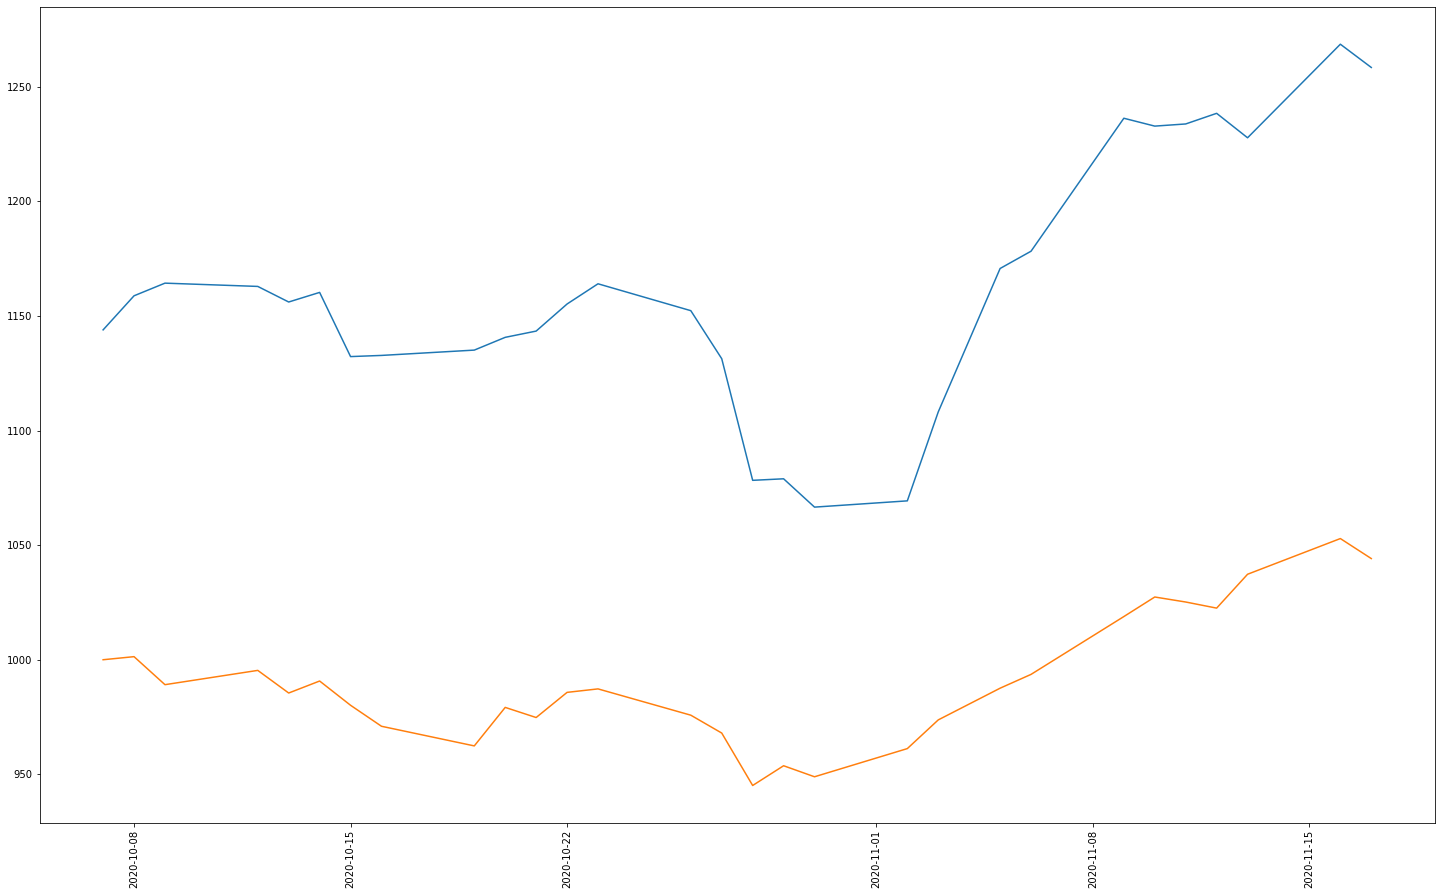

In [348]:
plt.figure(figsize=(25,15))
plt.xticks(rotation='vertical')

# df_compare['ind'] = df_compare['ind']*1000
df_compare = df_compare[['CLOSE', 'ind']]
plt.plot(df_compare);

In [349]:
df_compare.corr()

,CLOSE,ind
CLOSE,1.000000,0.984842
ind,0.984842,1.000000
